In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc
import matplotlib.dates as mdates
%matplotlib inline

pd.set_option('max_rows', 300)
pd.set_option('max_columns', 150)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#### 登陆界面

In [2]:
import tkinter as tk
import ttk

window = tk.Tk()
window.title("佳期技术模拟套利系统")
# menu_widget.entryconfig(0, bg='#a1dbcd')

# the main window is divided into left and right sections,
# and the sidebar is divided into a top and bottom section.
pw = tk.PanedWindow(orient="vertical", background="#4f4f4f")
sidebar = tk.PanedWindow(pw, orient="horizontal", background="#4f4f4f")
main = tk.Frame(pw, width=400, height=400, background="#4f4f4f", borderwidth=2)
sidebar_frame = tk.Frame(sidebar, width=200, height=120, background="#4f4f4f", borderwidth=1)

# add the paned window to the window
pw.pack(fill="both", expand=True)

# add the sidebar and main area to the main paned window
pw.add(sidebar)
pw.add(main)

# add the top and bottom to the sidebar
sidebar.add(sidebar_frame)
title = tk.Label(sidebar_frame, text='佳期技术模拟套利系统', fg='#e2d397', bg='#4f4f4f', height=2)
title.pack(fill='x')
title.config(font=('System', 25))

startX = 110
startY = 30
label = tk.Label(main, text='账户： ', fg='#e2d397', bg='#4f4f4f')
label.place(x=startX, y=startY)
entry = tk.Entry(main)
entry.place(x=startX+40, y=startY)
label = tk.Label(main, text='密码： ', fg='#e2d397', bg='#4f4f4f')
label.place(x=startX, y=startY+40)
entry = tk.Entry(main, show='*')
entry.place(x=startX+40, y=startY+40)
button = tk.Button(main, text='登陆', fg='#e2d397', bg='#4f4f4f')
button.place(x=startX+20, y = startY+80)
button = tk.Button(main, text='退出', fg='#e2d397', bg='#4f4f4f')
button.place(x=startX+130, y = startY+80)

window.mainloop()

#### main UI

In [5]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")
# width = 300*2
# height = 369

# screen_width = window.winfo_screenwidth()
# screen_height = window.winfo_screenheight()
# x = (screen_width/2) - (width/2)
# y = (screen_height/2) - (height/2)
# window.geometry("%dx%d+%d+%d" % (width, height, x, y))
# window.resizable(0, 0)

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)


pw = ttk.PanedWindow(orient="vertical")
sidebar1 = ttk.PanedWindow(pw, orient="horizontal")
sidebar2 = ttk.PanedWindow(pw, orient="horizontal")
sidebar3 = ttk.PanedWindow(pw, orient="horizontal")

pw.pack(fill="both", expand=True)
pw.add(sidebar1)
pw.add(sidebar2)
pw.add(sidebar3)

sidebar1_left = Frame(sidebar1, width=200, height=120, background="#4f4f4f")
sidebar1_mid = Frame(sidebar1, width=200, height=120, background="#4f4f4f")
sidebar1_right = Frame(sidebar1, width=200, height=120, background="#4f4f4f")
sidebar1.add(sidebar1_left)
sidebar1.add(sidebar1_mid)
sidebar1.add(sidebar1_right)

title = Label(sidebar1_left, text='模拟行情', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
title.config(font=("System", 25))
title.pack(fill='x')
title = Label(sidebar1_mid, text='模拟买卖', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
title.config(font=("System", 25))
title.pack(fill='x')
title = Label(sidebar1_right, text='模拟申赎', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
title.config(font=("System", 25))
title.pack(fill='x')

sidebar2_left = Frame(sidebar2, width=200, height=120, background="#4f4f4f")
sidebar2_mid = Frame(sidebar2, width=200, height=120, background="#4f4f4f")
sidebar2_right = Frame(sidebar2, width=200, height=120, background="#4f4f4f")
sidebar2.add(sidebar2_left)
sidebar2.add(sidebar2_mid)
sidebar2.add(sidebar2_right)

title = Label(sidebar2_left, text='模拟套利', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
title.config(font=("System", 25))
title.pack(fill='x')
title = Label(sidebar2_mid, text='一篮子买卖', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
title.config(font=("System", 25))
title.pack(fill='x')
title = Label(sidebar2_right, text='费率设置', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
title.config(font=("System", 25))
title.pack(fill='x')

sidebar3_left = Frame(sidebar3, width=200, height=120, background="#4f4f4f")
sidebar3_mid = Frame(sidebar3, width=200, height=120, background="#4f4f4f")
sidebar3_right = Frame(sidebar3, width=200, height=120, background="#4f4f4f")
sidebar3.add(sidebar3_left)
sidebar3.add(sidebar3_mid)
sidebar3.add(sidebar3_right)

title = Label(sidebar3_left, text='其他操作', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
title.config(font=("System", 25))
title.pack(fill='x')
title = Label(sidebar3_mid, text='问题反馈', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
title.config(font=("System", 25))
title.pack(fill='x')
# title = Label(sidebar3_right, text='其他理财', fg='#e2d397', bg='#4f4f4f', height=4, width=15)
# title.config(font=("System", 25))
# title.pack(fill='x')

window.mainloop()

#### ETF 套利行情

In [9]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)

sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='选择指数基金', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='选择基金单位', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='溢价盘口', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='折价盘口', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')


### 2nd row
mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='溢价套利', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='预计收益', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='手工套利', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='折价套利', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='预计收益', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='手工套利', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='指数基金',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['基金50', '基金180', '基金HL', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='基金溢价盘口市值',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2362000.00', '2127170.21', '1242142.50', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='成分股溢价盘口市值',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2370639.11', '2135292.37', '1245215.01', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='溢价预期费用',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['1999.16', '1794.97', '1100.88', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='溢价预期盈利',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['-10638.27', '-9917.13', '-4173.39', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='基金折价盘口市值',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2364088.40', '2133122.50', '1245913.68', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='成分股折价盘口市值',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2368345.40', '2133212.37', '1243404.01', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='折价预期费用',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['4313.46', '3873.04', '2345.35', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='折价预期盈利',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['56.74', '-3783.29', '-4855.91', '', '', '', '', '','', '', '','', '', '']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
# for col in ['6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y',
#             '6Y', '7Y', '8Y', '9Y', '10Y', '30Y']:
#     mainCol = Frame(sidebar3, borderwidth=2, bg='#4f4f4f')
#     mainCol.pack(expand=True, fill='both')
#     sidebar3.add(mainCol)
#     if col == '3Y':
#         label = Label(mainCol, text=col, fg='#e2d397', bg='#4f4f4f')
#     else:
#         label = Label(mainCol, text=col, fg='#f7fafc', bg='#4f4f4f')
#     label.config(font=("System", 4))
#     label.pack(fill='x')
    
# for col in ['走势', '期限结构']:
#     mainCol = Frame(sidebar4, borderwidth=2, bg='#4f4f4f')
#     mainCol.pack(expand=True, fill='both')
#     sidebar4.add(mainCol)
#     if col == '走势':
#         label = Label(mainCol, text=col, fg='#e2d397', bg='#4f4f4f')
#     else:
#         label = Label(mainCol, text=col, fg='#f7fafc', bg='#4f4f4f')
#     label.config(font=("System", 4))
#     label.pack(fill='x')

# mainCol = Frame(sidebar6, borderwidth=2, bg='#4f4f4f')
# mainCol.pack(expand=True, fill='both')
# sidebar6.add(mainCol)

# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(211)
# data1 = np.array([3.29, 3.31, 3.31, 3.315, 3.315, 3.31, 3.305, 3.305, 3.315, 3.31, 3.31, 3.31,
#                   3.31, 3.3, 3.36, 3.365, 3.4, 3.41, 3.405, 3.405, 3.41, 3.41, 3.41, 3.4, 3.4, 3.39, 3.39, 3.395, 3.395])
# ax.plot(data1, color='#f2815e')
# ax.set_title('日内走势')
# ax.set_xlabel('3Y国开债')
# ax.set_xlim(0,90)
# xindexReset = np.arange(0, 100, 10)
# ax.set_xticks(xindexReset);
# xlabelReset = ['8:30', '9:30', '10:30', '11:30', '12:30', '13:30', '14:30', '15:30', '16:30', '17:30']
# ax.set_xticklabels(xlabelReset)
# ax.set_ylim(3.25, 3.43)
# yindexReset = np.arange(3.26, 3.42, 0.02)
# ax.set_yticks(yindexReset)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_facecolor('#90d1fc')
# fig.patch.set_facecolor('#90d1fc')
# axisColor = '#585570'
# ax.spines['bottom'].set_color(axisColor)
# ax.spines['left'].set_color(axisColor)
# ax.tick_params(axis='x', colors=axisColor)
# ax.tick_params(axis='y', colors=axisColor)
# ax.yaxis.label.set_color(axisColor)
# ax.xaxis.label.set_color(axisColor)
# ax.title.set_color(axisColor)

# ax = fig.add_subplot(212)
# data1 = np.array([3.4, 3.36, 3.41, 3.5, 3.48, 3.455, 3.44, 3.49, 3.44, 3.45, 3.4, 3.5, 3.32, 3.329, 3.28, 3.22, 3.225,
#                   3.22, 3.24, 3.25, 3.33, 3.29, 3.36, 3.35, 3.32, 3.33])
# ax.plot(data1, color='#f2815e')
# ax.set_title('历史走势')
# ax.set_xlabel('3Y国开债')
# ax.set_xlim(0,26)
# xindexReset = np.arange(0, 30, 5)
# ax.set_xticks(xindexReset);
# xlabelReset = ['04-18', '04-27', '05-06', '05-15', '05-24', '05-30']
# ax.set_xticklabels(xlabelReset)
# ax.set_ylim(3.05, 3.6)
# yindexReset = np.arange(3.05, 3.6, 0.05)
# ax.set_yticks(yindexReset)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_facecolor('#90d1fc')
# fig.patch.set_facecolor('#90d1fc')
# axisColor = '#585570'
# ax.spines['bottom'].set_color(axisColor)
# ax.spines['left'].set_color(axisColor)
# ax.tick_params(axis='x', colors=axisColor)
# ax.tick_params(axis='y', colors=axisColor)
# ax.yaxis.label.set_color(axisColor)
# ax.xaxis.label.set_color(axisColor)
# ax.title.set_color(axisColor)

# plt.subplots_adjust(hspace=0.4)
    
# canvas = FigureCanvasTkAgg(fig, master=mainCol)
# canvas.get_tk_widget().pack(fill='x')
# canvas.draw()
    
window.mainloop()

#### ETF折价、溢价曲线

In [ ]:
readPath = r''
data = pd.read_pickle(os.path.join(readPath, 'Tick_SH5100050',pkl))
data = pd.readpickle (os.path.join9ReadPaht, 'tiskf')

In [11]:
readPath = r'D:\Dropbox (study-int)\Personal - Kevin\Python Scripts\Study\Study41 - ETF study\data'
data = pd.read_pickle(os.path.join(readPath, 'Tick_SH510050.pkl'))
data = data[data['intdate'] == 43644].reset_index(drop=True)
data['tmInSec'] = data.time.dt.hour*3600 + data.time.dt.minute*60 + data.time.dt.second
data['tmIn10Sec'] = data['tmInSec']//10
data = data.groupby(['tmIn10Sec']).last().reset_index(drop=True)

In [12]:
data['premium'] = data['NAV']/data['bid1p'] - 1
data['discount'] = data['ask1p']/data['NAV']  - 1

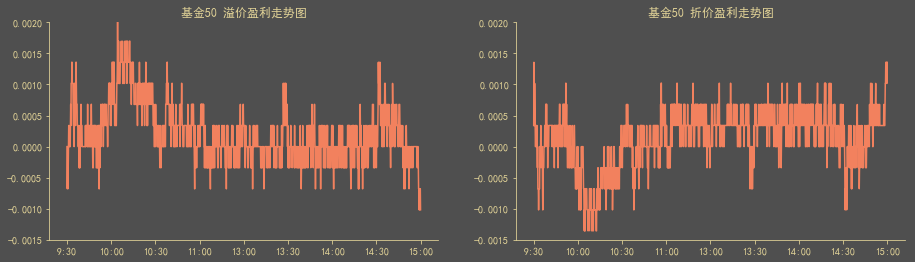

In [14]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)


main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)

sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='选择指数基金', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='选择基金单位', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='溢价盘口', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='折价盘口', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')


### 2nd row
mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='溢价套利', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='预计收益', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='手工套利', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='折价套利', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='预计收益', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='手工套利', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

### 3rd row
    
mainCol = Frame(sidebar3, borderwidth=2, bg='#CCC')
mainCol.pack(expand=True, fill='both')
sidebar3.add(mainCol)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.plot(data['premium'].values, color='#f2815e')
ax.set_title('基金50 溢价盈利走势图')
xindexReset = np.arange(0, 1600, 180)
ax.set_xticks(xindexReset);
xlabelReset = ['9:30', '10:00', '10:30', '11:00', '13:00', '13:30', '14:00', '14:30', '15:00']
ax.set_xticklabels(xlabelReset)
ax.set_ylim(-0.0015, 0.0020)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_facecolor('#4f4f4f')
fig.patch.set_facecolor('#4f4f4f')

# axisColor = '#b2d9ed'
axisColor = '#e2d397'
ax.spines['bottom'].set_color(axisColor)
ax.spines['left'].set_color(axisColor)
ax.tick_params(axis='x', colors=axisColor)
ax.tick_params(axis='y', colors=axisColor)
ax.yaxis.label.set_color(axisColor)
ax.xaxis.label.set_color(axisColor)
ax.title.set_color(axisColor)

ax = fig.add_subplot(122)
ax.plot(data['discount'].values, color='#f2815e')
ax.set_title('基金50 折价盈利走势图')
xindexReset = np.arange(0, 1600, 180)
ax.set_xticks(xindexReset);
xlabelReset = ['9:30', '10:00', '10:30', '11:00', '13:00', '13:30', '14:00', '14:30', '15:00']
ax.set_xticklabels(xlabelReset)
ax.set_ylim(-0.0015, 0.0020)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_facecolor('#4f4f4f')
fig.patch.set_facecolor('#4f4f4f')

# axisColor = '#b2d9ed'
axisColor = '#e2d397'
ax.spines['bottom'].set_color(axisColor)
ax.spines['left'].set_color(axisColor)
ax.tick_params(axis='x', colors=axisColor)
ax.tick_params(axis='y', colors=axisColor)
ax.yaxis.label.set_color(axisColor)
ax.xaxis.label.set_color(axisColor)
ax.title.set_color(axisColor)

plt.subplots_adjust(wspace=0.2)
    
canvas = FigureCanvasTkAgg(fig, master=mainCol)
canvas.get_tk_widget().pack(fill='x')
canvas.draw()

window.mainloop()

#### 一篮子股票买入

In [15]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar5 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')
sidebar6 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)
sidebar4.pack(fill='both', expand=1)
sidebar5.pack(fill='both', expand=1)
sidebar6.pack(fill='both', expand=1)

sidebar4.add(sidebar5)
sidebar4.add(sidebar6)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金代码', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金单位', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='盘口选择', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')


### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='一篮子买入', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Checkbutton(mainCol, text='使用余额', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='撤单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='置信度 %', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='自动撤单时间(秒)', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Checkbutton(mainCol, text='自动补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代码',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [600900,600005,601899,601857,601328,601006,600009,600177,601390,601169,600030,600320,600362,600519]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='名称',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['长江电力', '武钢股份', '紫金矿业', '中国石油', '交通银行', '大秦铁路', '上海机场', '雅戈尔', '中国中铁',
            '北京银行', '中信证券', '振华重工', '江西铜业', '贵州茅台']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='权重数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [3700, 3100, 2100, 3800, 17100, 4800, 1300, 1500, 4900, 4100, 2900, 1700, 500, 400]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='实际盘口',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['卖1','卖1','卖1','卖1','卖5','卖2','卖2','卖2','卖3','卖2','卖1','卖1','卖1','卖1']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='盘口价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['16.00','6.69','9.42','15.00','9.12','9.83','13.02','15.88','5.08','18.42','27.59','10.90','43.25','161.50']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['16.00','6.69','9.42','15.00','9.09','9.83','13.02','15.87','5.08','18.42','0.00','10.90','43.25','0.00']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='盘口数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [5000, 3200, 7000, 7700, 10100, 7400, 1700, 2700, 5200, 5200, 3100, 5100, 3100, 1500]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可申购数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [200,0,100,0,11200,0,0,700,200,0,5600,0,0,114164]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='缺口数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [350,310,200,380,590,480,130,80,470,410,'',170,50,'']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
### 4th row
mainCol1 = Frame(sidebar5, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='操作信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:04:23] 基金卖出完成，套利结束', '[10:04:26] 开始发送一篮子委托请求',
            '[10:04:27] 接受请求, 开始处理委托明细', '[10:04:28] 一篮子委托发送完毕, 共41笔, 成功40笔, 失败1笔']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='套利信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:04:27.225]601166 - [H100]您的委托价格超过竞价范围, 请确认是否进行委托',
            '[10:04:27.682]601166 - [H100]您的委托价格超过竞价范围, 请确认是否进行委托',
            '[10:04:27.941]601166 - [H100]您的委托价格超过竞价范围, 请确认是否进行委托']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')


    
window.mainloop()

#### 撤单和补单

In [16]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar5 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')
sidebar6 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)
sidebar4.pack(fill='both', expand=1)
sidebar5.pack(fill='both', expand=1)
sidebar6.pack(fill='both', expand=1)

sidebar4.add(sidebar5)
sidebar4.add(sidebar6)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='盘口选择', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Button(mainCol, text='补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Button(mainCol, text='撤单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')


### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='需要补单股票列表', fg='#e2d397', bg='#4f4f4f', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')


### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['1','2','3','4','5','6','7','8','9', ' ', '汇总']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代码',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['600005', '600019', '600028', '600104', '600362', '600795', '601390', '601857', '601958', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='名称',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['武钢股份', '宝钢股份', '中国石化', '上海汽车', '江西铜业', '国电电力', '中国中铁',
            '中国石油', '金钼股份', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='权重数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['3100', '5700', '4000', '1700', '400', '2400', '5000', '3800', '900', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='实际盘口',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['卖2','卖2','卖1','卖1','卖1','卖1','卖1','卖1','卖1', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='盘口价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['6.63', '7.19', '12.26', '19.44', '43.18', '8.76', '5.06', '15.03', '23.21', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['6.62', '7.19', '12.26', '19.44', '43.18', '8.76', '5.06', '15.01', '23.20', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='盘口数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['5300', '8000', '4700', '4600', '2700', '3000', '6000', '3800', '6000', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='现金替代',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['否','否','否','否','否','否','否','否','否',' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
window.mainloop()

#### ETF申购

In [22]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar5 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')
sidebar6 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)
sidebar4.pack(fill='both', expand=1)
sidebar5.pack(fill='both', expand=1)
sidebar6.pack(fill='both', expand=1)

sidebar4.add(sidebar5)
sidebar4.add(sidebar6)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金代码', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金单位', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金份额', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')


### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='基金申购', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='直接进入下一操作流程', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代码',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [600000, 600005, 600009, 600015, 600016, 600018, 600019, 600028, 600029, 600030,
            600036, 600048, 600050, 600104, 600177]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='名称',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['浦发银行', '武钢股份', '上海机场', '华夏银行', '民生银行', '上港集团', '宝钢股份', '中国石化', '南方航空',
            '中信证券', '招商银行', '保利地产', '中国联通', '上海汽车', '雅戈尔']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='权重数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [5600, 3100, 1300, 2200, 17800, 4300, 5600, 4000, 1800, 2900, 11000, 1500, 8300, 1700, 1500]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代替标准',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['1-允许']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='溢价比例',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.10']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代替金额',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.00']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可申购数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [54200, 2700, 1300, 129100, 17800, 4300, 0, 0, 1800, 8500, 11000, 2200, 8300, 0, 2200]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='缺口数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [0, 400, 0, 0, 0, 0, 5600, 4000, 0, 0, 0, 0, 0, 1700, 0]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可卖数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [54300, 3000, 0, 129200, 200, 4000, 5700, 300, 0, 5600, 100, 2000, 100, 0, 2200]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
### 4th row
mainCol1 = Frame(sidebar5, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='操作信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:04:26] 开始发送一篮子委托请求', '[10:04:26] 接受请求, 开始处理委托明细',
            '[10:04:27] 一篮子委托发送完毕, 共41笔, 成功40笔, 失败1笔', '[10:04:28] 撤单请求已接受，共发送13笔',
            '[10:04:29] 一篮子股票买入全部完成，共成交27笔，撤单13笔']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='套利信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:04:27.225]601166 - [H100]您的委托价格超过竞价范围, 请确认是否进行委托',
            '[10:04:27.682]601166 - [H100]您的委托价格超过竞价范围, 请确认是否进行委托',
            '[10:04:27.941]601166 - [H100]您的委托价格超过竞价范围, 请确认是否进行委托',
            '[10:04:28.407]601166 - [H100]您的委托价格超过竞价范围, 请确认是否进行委托']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')


    
window.mainloop()

### 补单操作

In [23]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar5 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')
sidebar6 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)
sidebar4.pack(fill='both', expand=1)
sidebar5.pack(fill='both', expand=1)
sidebar6.pack(fill='both', expand=1)

sidebar4.add(sidebar5)
sidebar4.add(sidebar6)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='盘口选择', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Button(mainCol, text='补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Button(mainCol, text='撤单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')


### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='需要补单股票列表', fg='#e2d397', bg='#4f4f4f', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')


### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['1','2','3','4','5','6','7','8','9', ' ', '汇总']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代码',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['600005', '600019', '600028', '600104', '600362', '600795', '601390', '601857', '601958', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='名称',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['武钢股份', '宝钢股份', '中国石化', '上海汽车', '江西铜业', '国电电力', '中国中铁',
            '中国石油', '金钼股份', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='权重数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['3100', '5700', '4000', '1700', '400', '2400', '5000', '3800', '900', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='实际盘口',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['卖2','卖2','卖1','卖1','卖1','卖1','卖1','卖1','卖1', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='盘口价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['6.63', '7.19', '12.26', '19.44', '43.18', '8.76', '5.06', '15.03', '23.21', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['6.62', '7.19', '12.26', '19.44', '43.18', '8.76', '5.06', '15.01', '23.20', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='盘口数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['5300', '8000', '4700', '4600', '2700', '3000', '6000', '3800', '6000', ' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='现金替代',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['否','否','否','否','否','否','否','否','否',' ', ' ']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
window.mainloop()

### ETF卖出

In [31]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar5 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')
sidebar6 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)
sidebar4.pack(fill='both', expand=1)
sidebar5.pack(fill='both', expand=1)
sidebar6.pack(fill='both', expand=1)

sidebar4.add(sidebar5)
sidebar4.add(sidebar6)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金代码', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金单位', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='盘口选择', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='委托价格', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='委托数量', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='基金卖出', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='撤单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='自动撤单时间(秒)', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Checkbutton(mainCol, text='自动补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='直接进入下一操作流程', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1] + [' ']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代码',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [510050]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='名称',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['基金50']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可卖数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [74987700]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可申购数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['73991700']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可买数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['84078000']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.000']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='成交价格',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.000']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='成交数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [0]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
### 4th row
mainCol1 = Frame(sidebar5, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='操作信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:04:29] 已经接受请求，开始处理', '[10:04:29] 510051 基金申购请求发生成功',
            '[10:04:29] 基金申购全部完成，共成交1笔，撤单0笔', '[10:04:30] 基金申购完成，进入基金卖出流程']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='套利信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:04:27.225]601166 - [H100]您的委托价格超过竞价范围, 请确认是否进行委托']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

window.mainloop()

### ETF 买入

In [40]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar5 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')
sidebar6 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)
sidebar4.pack(fill='both', expand=1)
sidebar5.pack(fill='both', expand=1)
sidebar6.pack(fill='both', expand=1)

sidebar4.add(sidebar5)
sidebar4.add(sidebar6)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金代码', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金单位', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='盘口选择', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='委托价格', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='委托数量', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='基金买入', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='撤单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='自动撤单时间(秒)', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Checkbutton(mainCol, text='自动补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='直接进入下一操作流程', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1] + [' ']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代码',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [510050]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='名称',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['基金50']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可卖数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [74987700]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可申购数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['73991700']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可买数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['84078000']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['1000000']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2.492']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='成交价格',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2.492']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='成交数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1000000]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
### 4th row
mainCol1 = Frame(sidebar5, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='操作信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:37:12]510050基金买入请求发送成功', '[10:37:11]510050基金买入全部完成，共成交1笔，撤单0笔'] + [' ']*3:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='套利信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

window.mainloop()

#### ETF赎回

In [42]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar5 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')
sidebar6 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)
sidebar4.pack(fill='both', expand=1)
sidebar5.pack(fill='both', expand=1)
sidebar6.pack(fill='both', expand=1)

sidebar4.add(sidebar5)
sidebar4.add(sidebar6)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金代码', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金单位', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金份额', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')


### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='基金赎回', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='直接进入下一操作流程', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代码',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [600000, 600005, 600009, 600015, 600016, 600018, 600019, 600028, 600029, 600030,
            600036, 600048, 600050, 600104, 600177]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='名称',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['浦发银行', '武钢股份', '上海机场', '华夏银行', '民生银行', '上港集团', '宝钢股份', '中国石化', '南方航空',
            '中信证券', '招商银行', '保利地产', '中国联通', '上海汽车', '雅戈尔']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='权重数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [5600, 3100, 1300, 2200, 17800, 4300, 5600, 4000, 1800, 2900, 11000, 1500, 8300, 1700, 1500]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代替标准',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['1-允许']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='溢价比例',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.10']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代替金额',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.00']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可卖数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [54200, 2700, 1300, 129100, 17800, 4300, 0, 0, 1800, 8500, 11000, 2200, 8300, 0, 2200]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='赎回数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [0]*16:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    

### 4th row
mainCol1 = Frame(sidebar5, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='操作信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:37:12]510050基金买入请求发送成功', '[10:37:13]510050基金买入全部完成，共成交1笔，撤单0笔',
            '[10:37:13]基金买入完成，进入基金赎回流程']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='套利信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [' ']*6:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')


    
window.mainloop()

#### 一篮子股票卖出

In [43]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar5 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')
sidebar6 = PanedWindow(sidebar4, orient="vertical", bg='#4f4f4f')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)
sidebar4.pack(fill='both', expand=1)
sidebar5.pack(fill='both', expand=1)
sidebar6.pack(fill='both', expand=1)

sidebar4.add(sidebar5)
sidebar4.add(sidebar6)


### 1st row
mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金代码', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='基金单位', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='盘口选择', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar1, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')


### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='一篮子卖出', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')


mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='撤单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='置信度 %', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='自动撤单时间(秒)', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Entry(mainCol, show='')
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Checkbutton(mainCol, text='自动补单', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='直接进入下一操作流程', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='代码',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [600005, 600009, 600015, 600016, 600018, 600019, 600028, 600029, 600030, 600036, 600048,
            600050, 600104, 600177]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='名称',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['武钢股份', '上海机场', '华夏银行', '民生银行', '上港集团', '宝钢股份', '中国石化', '南方航空', '中信证券',
            '招商银行', '保利地产', '中国联通', '上海汽车', '雅戈尔']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='权重数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [3100, 1300, 2200, 17800, 4300, 5700, 4000, 1800, 2900, 10800, 1400, 8300, 1700, 1500]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='实际盘口',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['买1', '买1', '买1', '买5', '买1', '买3', '买2', '买1', '买1', '买5', '买2', '买2', '买1', '买2']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='盘口价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['6.85', '12.83', '11.81', '6.29', '4.63', '7.11', '12.29', '5.93', '27.53',
            '16.35', '29.82', '4.81', '19.54', '15.71']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托价格',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.00']*14:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='盘口数量',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [5000, 1500, 3100, 22700, 6900, 12100, 6200, 3800, 6600, 9000, 2200, 9100, 2500, 5100]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='股票状态',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [' ']*15:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='可卖数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [3700, 1300, 122300, 16200, 4900, 11400, 4600, 1800, 2900, 11000, 1300, 8500, 1700, 1500]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='委托数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [0]*14:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='成交数量',  fg='#e2d397', bg='#4f4f4f', anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [3100, 1300, 2200, 17800, 4300, 0, 4000, 1800, 2900, 10800, 1400, 1400, 1700, 1500]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
### 4th row
mainCol1 = Frame(sidebar5, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='操作信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['[10:37:13]基金买入完成，进入基金赎回流程', '[10:37:13]已接受请求，开始处理',
            '[10:37:14]510051基金赎回全部完成，共完成1笔，撤单0笔', '[10:37:15]基金赎回完成，进入一篮子股票卖出流程']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='套利信息',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in []:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')


    
window.mainloop()

### ETF费率设置

In [35]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术模拟套利系统")

menu_widget = Menu(window)
menu_widget.add_command(label="模拟行情")
menu_widget.add_command(label="模拟买卖")
menu_widget.add_command(label="模拟申赎")
menu_widget.add_command(label="模拟套利")
menu_widget.add_command(label="一篮子买卖")
menu_widget.add_command(label="费率设置")
menu_widget.add_command(label="其他操作")
menu_widget.add_command(label="问题反馈")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#4f4f4f')

main.pack(fill='both', expand=True)
# main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
# main.add(sidebar4)
sidebar1.pack(fill='both', expand=1)
sidebar2.pack(fill='both', expand=1)
sidebar3.pack(fill='both', expand=1)

### 2nd row

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='修改费率', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
entry1 = Button(mainCol, text='刷新', fg='#e2d397', bg='#4f4f4f')
entry1.config(font=("System", 4))
entry1.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#4f4f4f')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='双击记录直接修改', fg='#e2d397', bg='#4f4f4f')
label.config(font=("System", 4))
label.pack(fill='x')

### 3rd row

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='序号',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [i for i in range(1, 13)] + [' ']*10:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='交易市场',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['深圳', '深圳', '深圳', '深圳', '深圳', '深圳', '上海', '上海', '上海', '上海', '上海', '上海']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='交易类别',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['买入', '买入', '申购', '卖出', '卖出', '赎回', '买入', '买入', '申购', '卖出', '卖出', '赎回']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='证券类比',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['股票', '基金', '基金', '股票', '基金', '基金', '股票', '基金', '基金', '股票', '基金', '基金']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='手续费率',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.0003500', '0.0003500', '0.0002500', '0.0003500', '0.0003500', '0.0002500',
            '0.0003500', '0.0003500', '0.0002500', '0.0003500', '0.0003500', '0.0002500']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='印花税率',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='s')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.0000000', '0.0000000', '0.0000000', '0.0010000', '0.0000000', '0.0000000',
            '0.0000000', '0.0000000', '0.0000000', '0.0010000', '0.0000000', '0.0000000']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='s')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='过户费率',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.0000000', '0.0000000', '0.0000000', '0.0010000', '0.0000000', '0.0000000',
            '0.0010000', '0.0000000', '0.0000000', '0.0010000', '0.0000000', '0.0000000',]:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar3, bg='#4f4f4f')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='其他费用',  fg='#e2d397', bg='#4f4f4f', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.0002175', '0.0001675', '0.0000000', '0.0002175', '0.0001675', '0.0000000',
            '0.0001800', '0.0001150', '0.0000000', '0.0001800', '0.0001150', '0.0000000']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#4f4f4f', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

window.mainloop()